In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

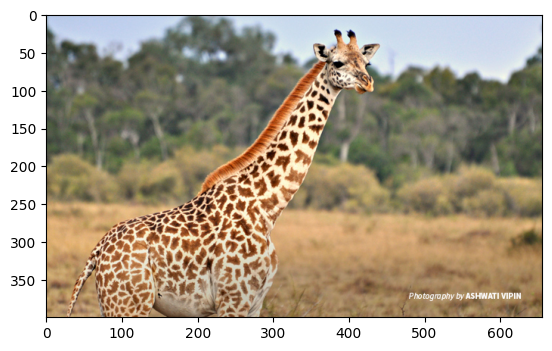

In [6]:
image=cv2.imread("./GiraffeConservationKenyaAWF.jpg")
image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)

In [7]:
image_rgb.shape

(400, 656, 3)

In [8]:
rows,cols,_=image_rgb.shape

input_points=np.float32([[50,50],[cols-50,50],[50,rows-50],[cols-50,rows-50]])

output_points=np.float32([[10,100],[cols-100,50],[100,rows-10],[cols-50,rows-100]])

'''
Transformation matrix for Perspective transformation

3 X 3

a,b,c
d,e,f
g,h,1

a,b,c is responsible for horizontal scaling,rotation and translation
d,e,f is responsible for vertical scaling,rotation and translation
g,h are perspective components that account for depth and skewness

'''

M=cv2.getPerspectiveTransform(input_points,output_points)
print(M)

[[ 1.19573838e+00  3.29091525e-01 -6.59688211e+01]
 [-7.55683848e-02  1.07457924e+00  5.27762002e+01]
 [ 3.36235591e-04  2.09112962e-04  1.00000000e+00]]


(np.float64(-0.5), np.float64(655.5), np.float64(399.5), np.float64(-0.5))

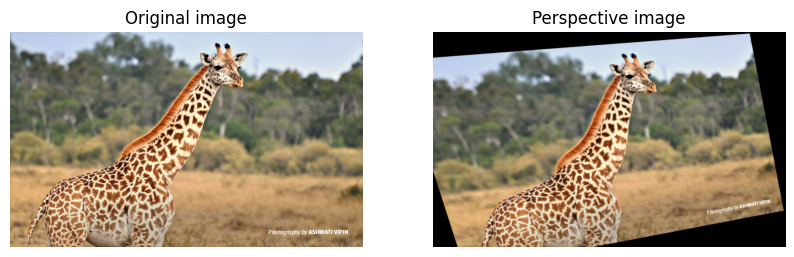

In [9]:
perspective_image=cv2.warpPerspective(image_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(perspective_image)
plt.title("Perspective image")
plt.axis('off')

## Affine transformation

(np.float64(-0.5), np.float64(655.5), np.float64(399.5), np.float64(-0.5))

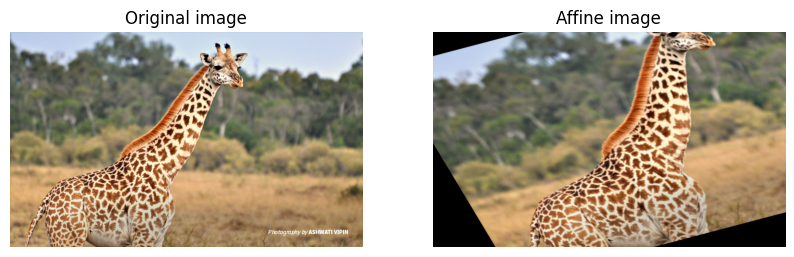

In [10]:
input_points=np.float32([[50,50],[200,50],[50,200]])

output_points=np.float32([[10,100],[200,50],[100,250]])

M=cv2.getAffineTransform(input_points,output_points)

affine_image=cv2.warpAffine(image_rgb,M,(cols,rows))

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Original image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(affine_image)
plt.title("Affine image")
plt.axis('off')